# CUSTOMER CHURN PREDICTION

### IMPORT LIBRARIES

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.simplefilter("ignore")

### LOAD DATA

In [59]:
df=pd.read_csv("C:/Users/lenovo laptop/Downloads/Churn_Modelling.csv")

### EXPLORATORY DATA ANALYSIS

In [60]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [62]:
df.size

140000

In [63]:
df.shape

(10000, 14)

In [64]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [65]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [67]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [68]:
is_Exited = df["Exited"].value_counts()
print("Yes: ",is_Exited[1])
print("No: ",is_Exited[0])

Yes:  2037
No:  7963


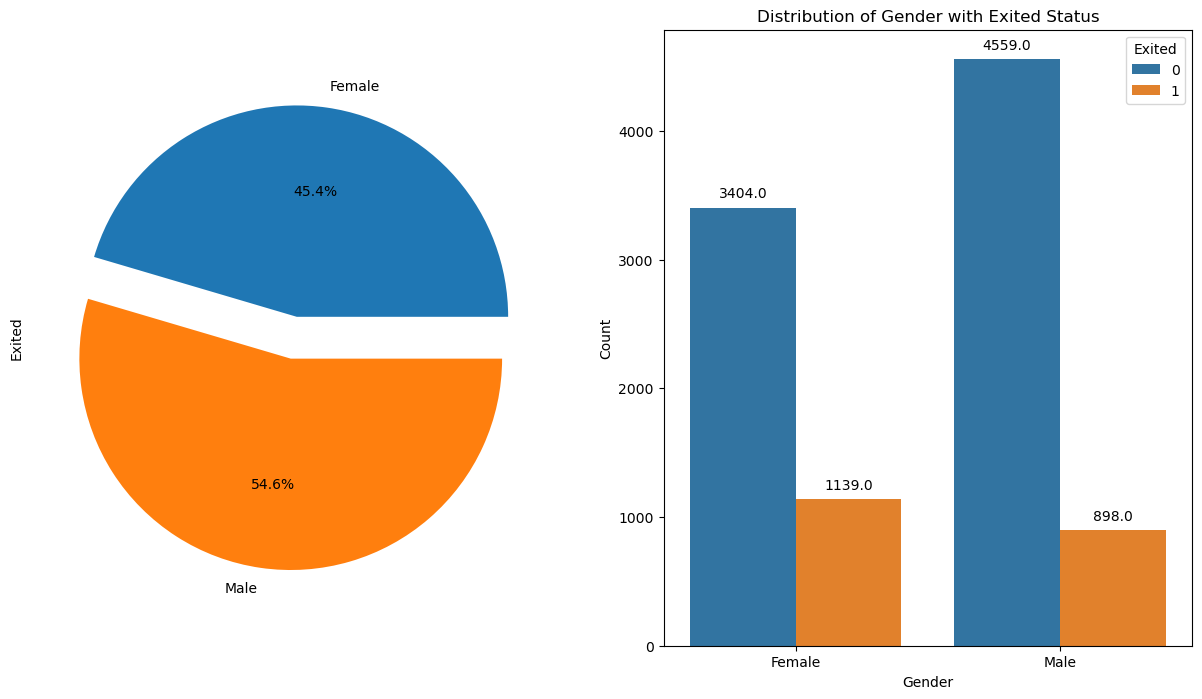

In [69]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="Gender", hue="Exited", data=df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Exited Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

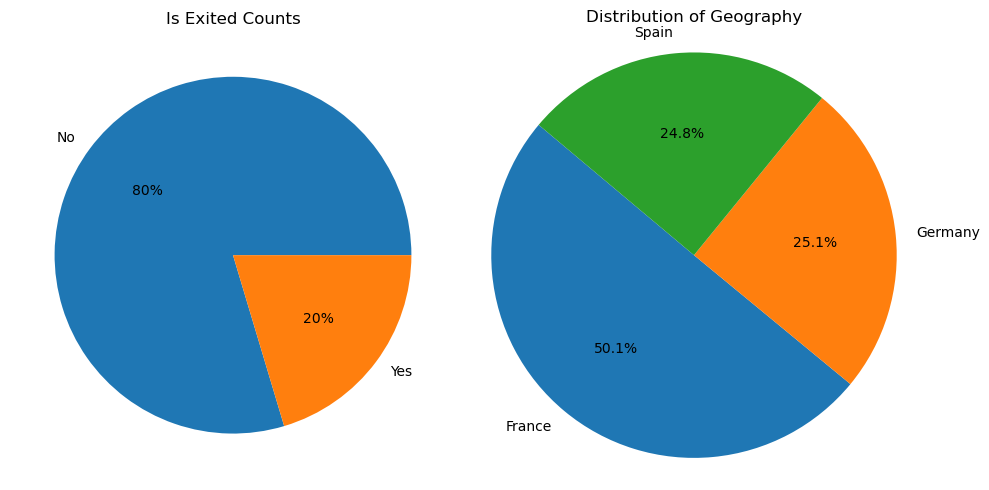

In [70]:
# Exited Counts Pie Chart
is_Exited = df["Exited"].value_counts()
plt.figure(figsize=(10, 5))  # Set the same figsize for both plots
plt.subplot(1, 2, 1)  # Subplot for the Exited Counts pie chart
plt.pie(is_Exited, labels=["No", "Yes"], autopct="%0.0f%%")
plt.title("Is Exited Counts")

# Distribution of Geography Pie Chart
plt.subplot(1, 2, 2)  # Subplot for the Distribution of Geography pie chart
geography_counts = df['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Geography')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, classification_report

### DATA PREPROCESSING

In [72]:
# Deleting unnessary columns
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [73]:
# Initialize label encoders
le = LabelEncoder()
# Fit and transform the data
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0


In [74]:
No_class = df[df["Exited"]==0]
yes_class = df[df["Exited"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)

X = down_samples.drop("Exited", axis=1)
y = down_samples["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### MODELS TRAINING AND EVALUATION

In [75]:
# LOGISTIC REGRESSION
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       410
           1       0.69      0.70      0.70       405

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815

Logistic Regression accuracy is: 69.69%


In [76]:
# DECISION TREE CLASSIFIER
DT = DecisionTreeClassifier(max_depth=(5), random_state=0)
DT.fit(X_train, y_train)
predict_DT = DT.predict(X_test)
print(classification_report(y_test, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(DT_accuracy*100))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       410
           1       0.81      0.67      0.73       405

    accuracy                           0.76       815
   macro avg       0.77      0.76      0.76       815
weighted avg       0.77      0.76      0.76       815

ID3 model accuracy is: 75.83%


In [77]:
# LINEAR SVC
SVM_model = LinearSVC()
SVM_model.fit(X_train, y_train)
predict = SVM_model.predict(X_test)

print(classification_report(y_test, predict))
SVM_accuracy = accuracy_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(SVM_accuracy*100))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       410
           1       0.69      0.70      0.70       405

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815

SVC model accuracy is: 69.69%


In [78]:
# RANDOM FOREST CLASSIFIER
RF = RandomForestClassifier(n_estimators=60, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       410
           1       0.78      0.77      0.77       405

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815

Random Forest model accuracy is: 77.55%


In [79]:
# GRADIENT BOOSTING CLASSIFIER
GB_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

GB_classifier.fit(X_train, y_train)
y_pred = GB_classifier.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate accuracy
GB_accuracy = accuracy_score(y_test, y_pred)
print('XGBoost model accuracy is: {:.2f}%'.format(GB_accuracy * 100))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       410
           1       0.77      0.76      0.77       405

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815

XGBoost model accuracy is: 77.06%


In [80]:
Algorithms = [ 'Logistic Regression', 'Decision Tree', 'SVC','Gradient Boosting', 'Random Forest']
accuracy = [GB_accuracy, RF_accuracy, DT_accuracy, LR_accuracy, SVM_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,Logistic Regression,0.770552
1,Decision Tree,0.775460
2,SVC,0.758282
3,Gradient Boosting,0.696933
4,Random Forest,0.696933


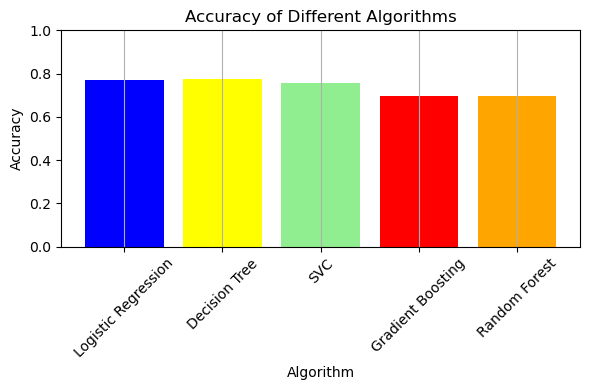

In [81]:
plt.figure(figsize=(6, 4))

# Define custom colors
colors = ['blue', 'yellow', 'lightgreen', 'red', 'orange']

# Plot the bar chart with custom colors
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors)

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()